In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# !apt-get install -y fonts-nanum
# !rm -rf /root/.cache/matplotlib

In [3]:
import matplotlib.font_manager as fm
from matplotlib import rc

# 1. 실제 폰트 파일 경로 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 2. 폰트 이름 얻기 (matplotlib 내부명)
font_name = fm.FontProperties(fname=font_path).get_name()
print("matplotlib이 인식한 폰트 이름:", font_name)

# 3. 폰트 적용
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지


matplotlib이 인식한 폰트 이름: NanumGothic


### 데이터로드

In [5]:
df = pd.read_csv('/content/baemin_reviews_playstore_100000.csv', encoding='utf-8-sig')

In [6]:
len(df)

100000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   app              100000 non-null  object
 1   platform         100000 non-null  object
 2   reviewId         100000 non-null  object
 3   userName         99999 non-null   object
 4   content          99997 non-null   object
 5   score            100000 non-null  int64 
 6   thumbsUpCount    100000 non-null  int64 
 7   at               100000 non-null  object
 8   sentiment_label  100000 non-null  int64 
 9   sentiment        100000 non-null  object
dtypes: int64(3), object(7)
memory usage: 7.6+ MB


### 결측치

In [8]:
df[df['content'].isna()]

,app,platform,reviewId,userName,content,score,thumbsUpCount,at,sentiment_label,sentiment
53150,배달의민족,playstore,95ed97b2-a7c0-48e8-b4d5-243c9573e2e5,Google 사용자,NaN,5,0,2019-03-22 04:10:35,1,positive
82300,배달의민족,playstore,70ad22dd-92bd-45f8-a6ee-ec51cb64476c,Google 사용자,NaN,5,0,2017-04-10 22:48:08,1,positive
91648,배달의민족,playstore,88d910f0-0583-4814-ac59-a67a800f2ae4,Google 사용자,NaN,5,0,2016-05-05 16:39:50,1,positive


In [9]:
# 빈 문자열 있는지 확인
df[(df['content'] == ' ') | (df['content'] == '')]

,app,platform,reviewId,userName,content,score,thumbsUpCount,at,sentiment_label,sentiment


In [10]:
df[df['userName'].isna()]

,app,platform,reviewId,userName,content,score,thumbsUpCount,at,sentiment_label,sentiment
9476,배달의민족,playstore,ef21b697-6d37-4e29-8ff5-ef90df7b073e,NaN,의도적으로 음식카테고리를 저렇게 표시해두면 처음이용바들은 저 아이콘만보고 배민1으로...,1,1,2023-08-26 12:41:05,-1,negative


In [11]:
# userName 결측치 처리
df.loc[df['userName'].isna(), 'userName'] = "Google 사용자"
# 리뷰텍스트 결측치 처리
df = df.dropna(subset=['content'])

In [12]:
# 처리 결과 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99997 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   app              99997 non-null  object
 1   platform         99997 non-null  object
 2   reviewId         99997 non-null  object
 3   userName         99997 non-null  object
 4   content          99997 non-null  object
 5   score            99997 non-null  int64 
 6   thumbsUpCount    99997 non-null  int64 
 7   at               99997 non-null  object
 8   sentiment_label  99997 non-null  int64 
 9   sentiment        99997 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.4+ MB


### 시간대별 데이터 확인

In [13]:
### 년도별 데이터 수 확인
df['at'] = pd.to_datetime(df['at'])
df['at'].dt.year.value_counts()

,count
at,
2019,27655
2018,16809
2016,12289
2020,9934
2017,8810
2021,5683
2025,4409
2024,4001
2022,3818


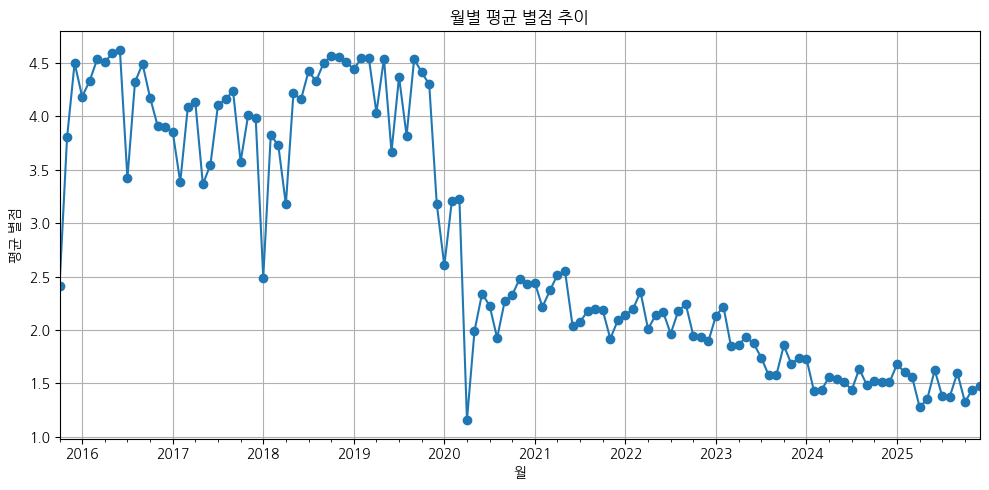

In [33]:
# 월별 별점 변화 추이
df['year_month'] = df['at'].dt.to_period('M')
monthly_score = df.groupby('year_month')['score'].mean()

plt.figure(figsize=(10,5))
monthly_score.plot(marker='o')
plt.title('월별 평균 별점 추이')
plt.xlabel('월')
plt.ylabel('평균 별점')
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
# 이전달 대비 별점 변화 추이 순위
monthly_score = pd.DataFrame(monthly_score)
monthly_score['prev_score'] = monthly_score['score'].shift(1)
monthly_score['mom_change'] = monthly_score['score'] - monthly_score['prev_score']
monthly_score['mom_change_abs'] = monthly_score['mom_change'].abs()
monthly_score = monthly_score.sort_values('mom_change_abs', ascending=False)
monthly_score.head(10)

,score,prev_score,mom_change,mom_change_abs
year_month,,,,
2020-04,1.154133,3.229167,-2.075033,2.075033
2018-01,2.489996,3.983827,-1.493831,1.493831
2015-11,3.803125,2.414062,1.389063,1.389063
2018-02,3.827443,2.489996,1.337447,1.337447
2016-07,3.419255,4.622847,-1.203592,1.203592
2019-12,3.178218,4.300443,-1.122226,1.122226
2018-05,4.216648,3.175796,1.040851,1.040851
2016-08,4.319419,3.419255,0.900165,0.900165
2019-06,3.668318,4.541341,-0.873023,0.873023
